In [6]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 19.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

df = pd.read_csv("loan_prediction_dataset.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Пропуски: абсолютное число и %

In [31]:
missing_count = df.isnull().sum()
missing_percent = df.isnull().mean() * 100
missing_table = pd.DataFrame({"Missing": missing_count, "%": missing_percent})
missing_table


,Missing,%
Loan_ID,0,0.000000
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Education,0,0.000000
Self_Employed,32,5.211726
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130


Визуализация пропущенных значений

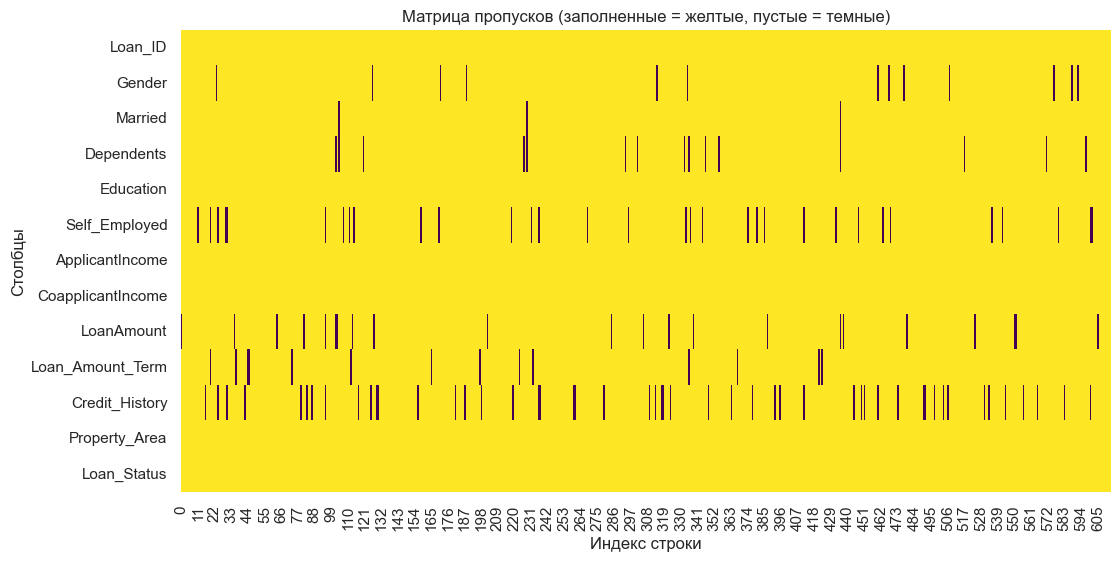

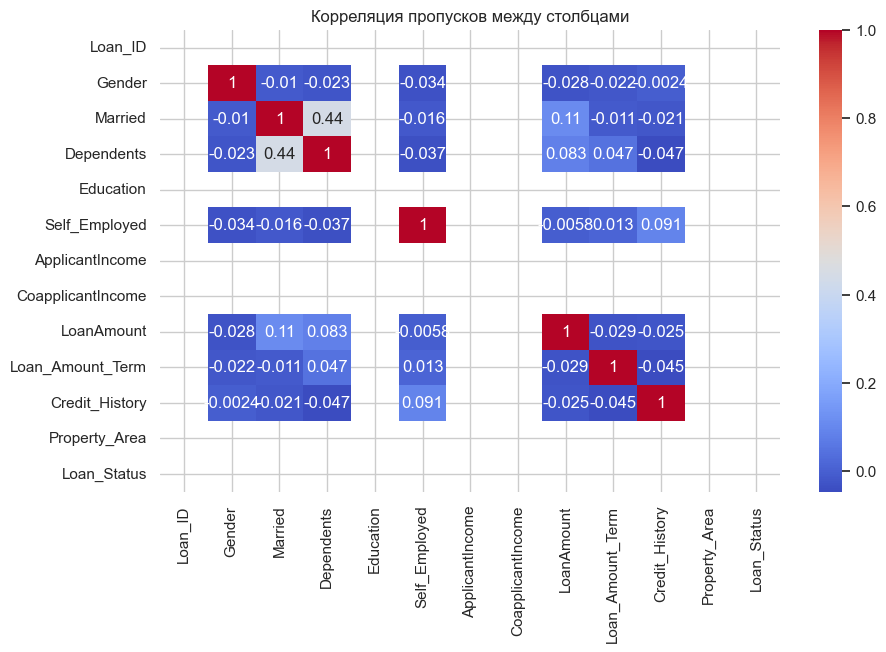

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_bool = df.isnull()

plt.figure(figsize=(12,6))
sns.heatmap(~missing_bool.T, cbar=False, cmap="viridis")  # True = заполнено, False = пусто
plt.title("Матрица пропусков (заполненные = желтые, пустые = темные)")
plt.xlabel("Индекс строки")
plt.ylabel("Столбцы")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(missing_bool.corr(), annot=True, cmap="coolwarm")
plt.title("Корреляция пропусков между столбцами")
plt.show()


Матрица показывает какие строки/столбцы содержат пропуски.
Тепловая карта показывает взаимосвязь пропусков между столбцами (вероятность совместного пропуска каких-то столбцов)

Больше всего пропусков в столбцах Self_Employed, LoanAmount и Credit_History

Разделение пропущенных на числовые и категориальные колонки

In [33]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Числовые:", num_cols)
print("Категориальные:", cat_cols)


Числовые: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Категориальные: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Заполнение пропусков

In [34]:
for col in ["LoanAmount", "ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term"]:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

for col in ["Gender", "Married", "Self_Employed", "Dependents"]:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)


Проверка пропусков после заполнения

In [35]:
df.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Сравним данные до

In [36]:
df_before = pd.read_csv("loan_prediction_dataset.csv")
print(df_before.describe())



       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


И данные после

In [37]:
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


Поиск выбросов для ApplicantIncome и LoanAmount

IQR-правило

In [38]:
for col in ["ApplicantIncome", "LoanAmount"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} - выбросы по IQR: {len(outliers_iqr)}")


ApplicantIncome - выбросы по IQR: 50
LoanAmount - выбросы по IQR: 41


Стандартное отклонение


In [39]:
for col in ["ApplicantIncome", "LoanAmount"]:
    mean = df[col].mean()
    std = df[col].std()
    outliers_std = df[(df[col] < mean - 3*std) | (df[col] > mean + 3*std)]
    print(f"{col} - выбросы по 3σ: {len(outliers_std)}")


ApplicantIncome - выбросы по 3σ: 8
LoanAmount - выбросы по 3σ: 15


Сравнение пересечения/расхождения

In [40]:
out_iqr_income = set(outliers_iqr.index)
out_std_income = set(outliers_std.index)

intersection = out_iqr_income & out_std_income
difference = out_iqr_income ^ out_std_income

print("Общие выбросы:", len(intersection))
print("Разные выбросы:", len(difference))


Общие выбросы: 15
Разные выбросы: 26


Визуальное подтверждение

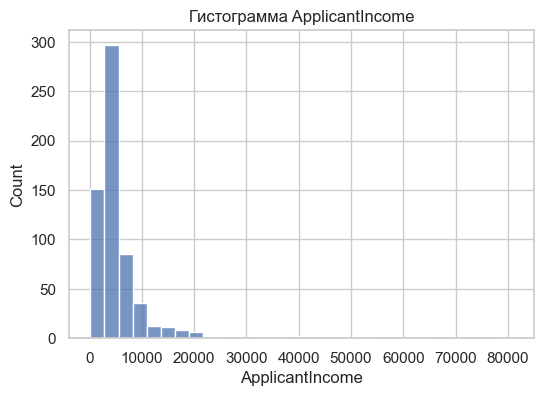

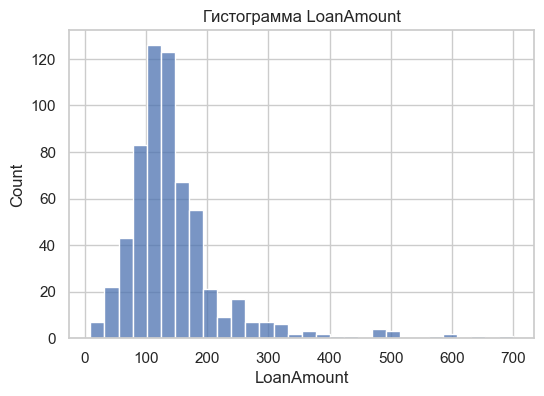

In [41]:
for col in ["ApplicantIncome", "LoanAmount"]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30)
    plt.title(f"Гистограмма {col}")
    plt.show()


Метод заполнения данных выбран и применен выше —— медианные значения для числовых и мода для категориальных

В датасете есть категориальные признаки, например Gender, Married, Education, Property_Area. Чтобы алгоритмы машинного обучения могли с ними работать, их нужно перевести в числа.

Поскольку большинство категориальных признаков не имеют порядка (номинальные), удобно использовать One-Hot Encoding: для каждой категории создаётся отдельный столбец с 1 (если категория есть) или 0 (если нет).

Так мы сохраняем смысл категорий и получаем данные, готовые для анализа и моделей.

In [42]:
df = pd.get_dummies(df, columns=["Loan_Status","Gender","Married","Education","Self_Employed","Property_Area"], drop_first=True)
df.head()


,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Y,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,True,True,False,False,False,False,True
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,False,True,True,False,False,False,False
2,LP001005,0,3000,0.0,66.0,360.0,1.0,True,True,True,False,True,False,True
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,True,True,True,True,False,False,True
4,LP001008,0,6000,0.0,141.0,360.0,1.0,True,True,False,False,False,False,True


Проверим перекодирование

In [44]:
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               614 non-null    object 
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           564 non-null    float64
 7   Loan_Status_Y            614 non-null    bool   
 8   Gender_Male              614 non-null    bool   
 9   Married_Yes              614 non-null    bool   
 10  Education_Not Graduate   614 non-null    bool   
 11  Self_Employed_Yes        614 non-null    bool   
 12  Property_Area_Semiurban  614 non-null    bool   
 13  Property_Area_Urban      614 non-null    bool   
dtypes: bool(7), float64(4), in

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Y,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,True,True,False,False,False,False,True
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,False,True,True,False,False,False,False
2,LP001005,0,3000,0.0,66.0,360.0,1.0,True,True,True,False,True,False,True
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,True,True,True,True,False,False,True
4,LP001008,0,6000,0.0,141.0,360.0,1.0,True,True,False,False,False,False,True
